In [4]:
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn import cross_validation
from sklearn import preprocessing
from features import train, test
import warnings
warnings.simplefilter("ignore") 

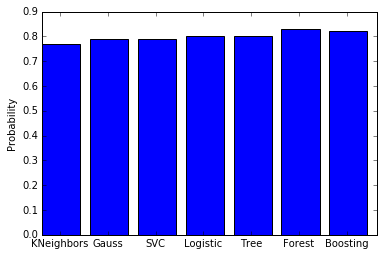

[0.77000000000000002, 0.79000000000000004, 0.79000000000000004, 0.80000000000000004, 0.80000000000000004, 0.82999999999999996, 0.81999999999999995]
Winner is:  Forest 0.83


In [5]:

X_train = train.drop("Survived",axis=1)
predictors = ["Pclass", "Fare", "Title", "Sex", "FamilySize"]
X = train[predictors] 
y = train["Survived"]

X = preprocessing.scale(X)

a1 = GaussianNB()
a2 = KNeighborsClassifier(n_neighbors=3) 
a3 = SVC(kernel="poly", gamma=3, cache_size=500, C = 0.8)
a4 = LogisticRegression()
a5 = DecisionTreeClassifier()
a6 = GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=3)
a7 = RandomForestClassifier(random_state=1, n_estimators=150, min_samples_split=8, min_samples_leaf=4)
 
algorithms=[a1, a2, a3, a4, a5, a6, a7]
d=[]
i = 0
for model in algorithms:
    scores=cross_validation.cross_val_score(model, X, y, scoring=None,
                                            cv=3, n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')
                    
    d.append(round(scores.mean(), 2))
    i = i + 1
    
x=np.arange(len(d))
algo_names = ['KNeighbors', 'Gauss', 'SVC', 'Logistic', 'Tree',
                             'Forest', 'Boosting']
plt.bar(x, d, label='Died')
plt.xticks(np.array(x)+0.37, algo_names)
plt.ylabel("Probability")
plt.xlabel("")
plt.show()

print(d)
print("Winner is: ", algo_names[d.index(max(d))], max(d))

TypeError: scatter() missing 1 required positional argument: 'y'

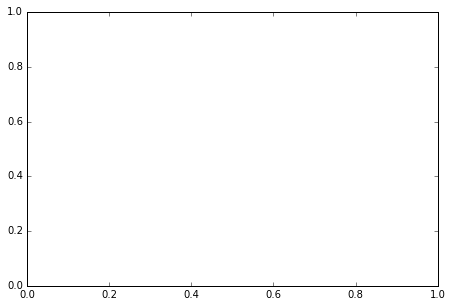

In [11]:
Y = y
# T = np.arctan2(Y,X)

plt.axes([0.025,0.025,0.95,0.95])
plt.scatter(X, s=75, alpha=.5)

plt.xlim(-1.5,1.5), plt.xticks([])
# savefig('../figures/scatter_ex.png',dpi=48)
plt.show()